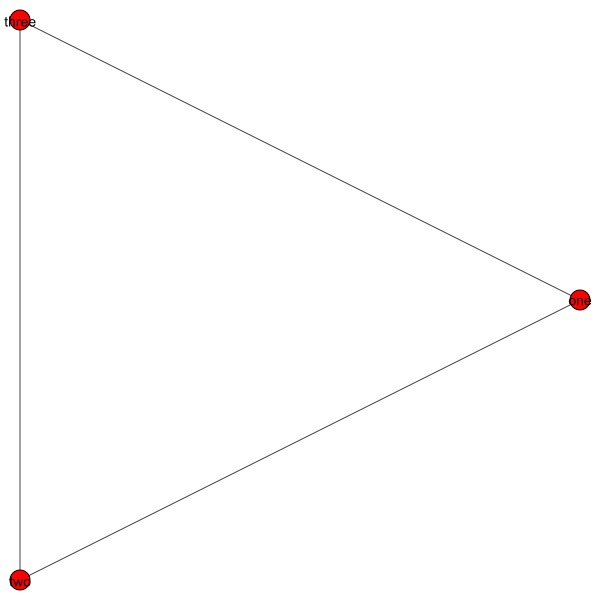

In [5]:
from igraph import *

vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=False)

plot(g)

In [9]:
library(igraph)

answers = read.table(textConnection(
   "  Player Q1_I1                                                             
    1      k     1                                                             
    2      l     0                                                             
    3      n     1                                                             
    4      m     0                                                             
    "))

topology = read.table(textConnection(
   "  Node.1 Node.2                                                            
    1      k      l                                                            
    2      l      k                                                            
    3      l      m                                                            
    4      m      l                                                            
    5      l      n                                                            
    6      n      l                                                            
    7      n      k                                                            
    8      k      n                                                            
 "))

g2 <- graph.data.frame(topology, vertices=answers, directed=FALSE)
g <- simplify(g2)
V(g)$color <- ifelse(V(g)$Q1_I1 == 1, "lightblue", "orange")

plot(g)

SyntaxError: EOL while scanning string literal (<ipython-input-9-ab38cc8f3001>, line 4)

In [4]:
from igraph import *
import numpy as np

# Create the graph
vertices = [i for i in range(7)]
edges = [(0,2),(0,1),(0,3),(1,0),(1,2),(1,3),(2,0),(2,1),(2,3),(3,0),(3,1),(3,2),(2,4),(4,5),(4,6),(5,4),(5,6),(6,4),(6,5)]

g = Graph(vertex_attrs={"label":vertices}, edges=edges, directed=True)

visual_style = {}

# Scale vertices based on degree
outdegree = g.outdegree()
visual_style["vertex_size"] = [x/max(outdegree)*25+50 for x in outdegree]

# Set bbox and margin
visual_style["bbox"] = (800,800)
visual_style["margin"] = 100

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Order vertices in bins based on outdegree
bins = np.linspace(0, max(outdegree), len(colours))  
digitized_degrees =  np.digitize(outdegree, bins)

# Set colors according to bins
g.vs["color"] = [colours[x-1] for x in digitized_degrees]

# Also color the edges
for ind, color in enumerate(g.vs["color"]):
        edges = g.es.select(_source=ind)
        edges["color"] = [color]
        
# Don't curve the edges
visual_style["edge_curved"] = False

# Community detection
communities = g.community_edge_betweenness(directed=True)
clusters = communities.as_clustering()

# Set edge weights based on communities
weights = {v: len(c) for c in clusters for v in c}
g.es["weight"] = [weights[e.tuple[0]] + weights[e.tuple[1]] for e in g.es]

# Choose the layout
N = len(vertices)
visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=1000, area=N**3, repulserad=N**3)
        
# Plot the graph
plot(g, **visual_style)

TypeError: 'maxiter' is an invalid keyword argument for this function